In [769]:
import pandas as pd
df=pd.read_csv(r"D:\ML\ML Project\model\data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [770]:
df=df.drop(['date','waterfront','view','condition','sqft_above','statezip','sqft_basement','yr_renovated','street','country'],axis='columns')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,city
0,313000.0,3.0,1.50,1340,7912,1.5,1955,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,1921,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,1966,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,1963,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,1976,Redmond


In [771]:
import math
import numpy as np
df.bathrooms=np.floor(df.bathrooms)
df.floors=np.ceil(df.floors)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,city
0,313000.0,3.0,1.0,1340,7912,2.0,1955,Shoreline
1,2384000.0,5.0,2.0,3650,9050,2.0,1921,Seattle
2,342000.0,3.0,2.0,1930,11947,1.0,1966,Kent
3,420000.0,3.0,2.0,2000,8030,1.0,1963,Bellevue
4,550000.0,4.0,2.0,1940,10500,1.0,1976,Redmond


In [772]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
yr_built       0
city           0
dtype: int64

In [773]:
df.nunique()

price          1741
bedrooms         10
bathrooms         8
sqft_living     566
sqft_lot       3113
floors            4
yr_built        115
city             44
dtype: int64

In [774]:
df.bedrooms.unique()

array([3., 5., 4., 2., 6., 7., 9., 1., 8., 0.])

In [775]:
df.floors.unique()

array([2., 1., 3., 4.])

In [776]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [777]:
df[~df.sqft_living.apply(is_float)]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,city


In [778]:
df['price_per_sqft']=df['price']/df['sqft_living']
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,city,price_per_sqft
0,313000.0,3.0,1.0,1340,7912,2.0,1955,Shoreline,233.582090
1,2384000.0,5.0,2.0,3650,9050,2.0,1921,Seattle,653.150685
2,342000.0,3.0,2.0,1930,11947,1.0,1966,Kent,177.202073
3,420000.0,3.0,2.0,2000,8030,1.0,1963,Bellevue,210.000000
4,550000.0,4.0,2.0,1940,10500,1.0,1976,Redmond,283.505155


In [779]:
df.city.value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [780]:
df.city=df.city.apply(lambda x:x.strip())
loc_stats=df.groupby('city')['city'].agg('count').sort_values(ascending=False)
loc_stats

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Vashon                   29
SeaTac                   29
Tukwila                  29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific        

In [781]:
df.city.nunique()

44

In [782]:
df.city.value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [783]:
loc_lessthan_10=loc_stats[loc_stats<=10]
df.city=df.city.apply(lambda x:'other' if x in loc_lessthan_10 else x)

In [784]:
df.city.value_counts()

city
Seattle             1573
Renton               293
Bellevue             286
Redmond              235
Issaquah             187
Kirkland             187
Kent                 185
Auburn               176
Sammamish            175
Federal Way          148
Shoreline            123
Woodinville          115
Maple Valley          96
Mercer Island         86
Burien                74
Snoqualmie            71
Kenmore               66
Des Moines            58
North Bend            50
Covington             43
Duvall                42
other                 41
Lake Forest Park      36
Newcastle             33
Bothell               33
SeaTac                29
Tukwila               29
Vashon                29
Enumclaw              28
Carnation             22
Normandy Park         18
Clyde Hill            11
Medina                11
Fall City             11
Name: count, dtype: int64

In [785]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,price_per_sqft
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.00000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.56500,1970.786304,265.876260
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.56739,29.731848,357.503344
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.00000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.00000,1951.000000,180.819021
50%,4.609435e+05,3.000000,2.000000,1980.000000,7.683000e+03,2.00000,1976.000000,243.853874
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.00000,1997.000000,314.843619
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,4.00000,2014.000000,22533.898305


In [786]:
df=df[df.price!=0]

In [787]:
import math
df.loc[df.bedrooms==0,'bedrooms']=math.floor(df.bedrooms.mean())
df.loc[df.bathrooms==0,'bathrooms']=math.floor(df.bathrooms.mean())


In [788]:
lower=df.price_per_sqft.mean()-3*df.price_per_sqft.std()
upper=df.price_per_sqft.mean()+3*df.price_per_sqft.std()
lower,upper

(-806.3146174622393, 1343.792444709307)

In [789]:
df=df[(df.price_per_sqft>=lower) & (df.price_per_sqft<=upper)]
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,city,price_per_sqft
0,313000.0,3.0,1.0,1340,7912,2.0,1955,Shoreline,233.582090
1,2384000.0,5.0,2.0,3650,9050,2.0,1921,Seattle,653.150685
2,342000.0,3.0,2.0,1930,11947,1.0,1966,Kent,177.202073
3,420000.0,3.0,2.0,2000,8030,1.0,1963,Bellevue,210.000000
4,550000.0,4.0,2.0,1940,10500,1.0,1976,Redmond,283.505155
5,490000.0,2.0,1.0,880,6380,1.0,1938,Seattle,556.818182
6,335000.0,2.0,2.0,1350,2560,1.0,1976,Redmond,248.148148
7,482000.0,4.0,2.0,2710,35868,2.0,1989,Maple Valley,177.859779
8,452500.0,3.0,2.0,2430,88426,1.0,1985,North Bend,186.213992
9,640000.0,4.0,2.0,1520,6200,2.0,1945,Seattle,421.052632


In [790]:
df['sqft_per_bedroom']=df['sqft_living']/df['bedrooms']
df.tail(10)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,city,price_per_sqft,sqft_per_bedroom
4590,380680.555556,4.0,2.0,2620,8331,2.0,1991,Renton,145.297922,655.000000
4591,396166.666667,3.0,1.0,1880,5752,1.0,1945,Seattle,210.726950,626.666667
4592,252980.000000,4.0,2.0,2530,8169,2.0,1993,Federal Way,99.992095,632.500000
4593,289373.307692,3.0,2.0,2538,4600,2.0,2013,Auburn,114.016276,846.000000
4594,210614.285714,3.0,2.0,1610,7223,2.0,1994,Kent,130.816327,536.666667
4595,308166.666667,3.0,1.0,1510,6360,1.0,1954,Seattle,204.083885,503.333333
4596,534333.333333,3.0,2.0,1460,7573,2.0,1983,Bellevue,365.981735,486.666667
4597,416904.166667,3.0,2.0,3010,7014,2.0,2009,Renton,138.506368,1003.333333
4598,203400.000000,4.0,2.0,2090,6630,1.0,1974,Seattle,97.320574,522.500000
4599,220600.000000,3.0,2.0,1490,8102,2.0,1990,Covington,148.053691,496.666667


In [791]:
df.sqft_per_bedroom.describe()

count    4547.000000
mean      627.447281
std       216.039541
min       163.333333
25%       476.666667
50%       585.000000
75%       735.000000
max      2140.000000
Name: sqft_per_bedroom, dtype: float64

In [792]:
lower_bedroom=df.sqft_per_bedroom.mean()-3*df.sqft_per_bedroom.std()
upper_bedroom=df.sqft_per_bedroom.mean()+3*df.sqft_per_bedroom.std()
lower_bedroom,upper_bedroom


(-20.67134160116325, 1275.565903513605)

In [793]:
df=df[(df.sqft_per_bedroom>=lower_bedroom) & (df.sqft_per_bedroom<=upper_bedroom)]
df.shape

(4488, 10)

In [794]:
df.city.value_counts()

city
Seattle             1548
Renton               288
Bellevue             274
Redmond              224
Issaquah             185
Kirkland             185
Kent                 183
Auburn               173
Sammamish            169
Federal Way          144
Shoreline            122
Woodinville          109
Maple Valley          95
Mercer Island         80
Burien                71
Snoqualmie            68
Kenmore               65
Des Moines            58
North Bend            50
Covington             41
other                 40
Duvall                40
Lake Forest Park      34
Newcastle             33
Bothell               33
Tukwila               29
SeaTac                28
Vashon                28
Enumclaw              27
Carnation             19
Normandy Park         17
Fall City             11
Medina                 9
Clyde Hill             8
Name: count, dtype: int64

In [795]:
b2=df[(df.bedrooms==2) &(df.city=='Seattle') &(df.yr_built==1949)]
b3=df[(df.bedrooms==3) &(df.city=='Seattle')&(df.yr_built==1949) ]

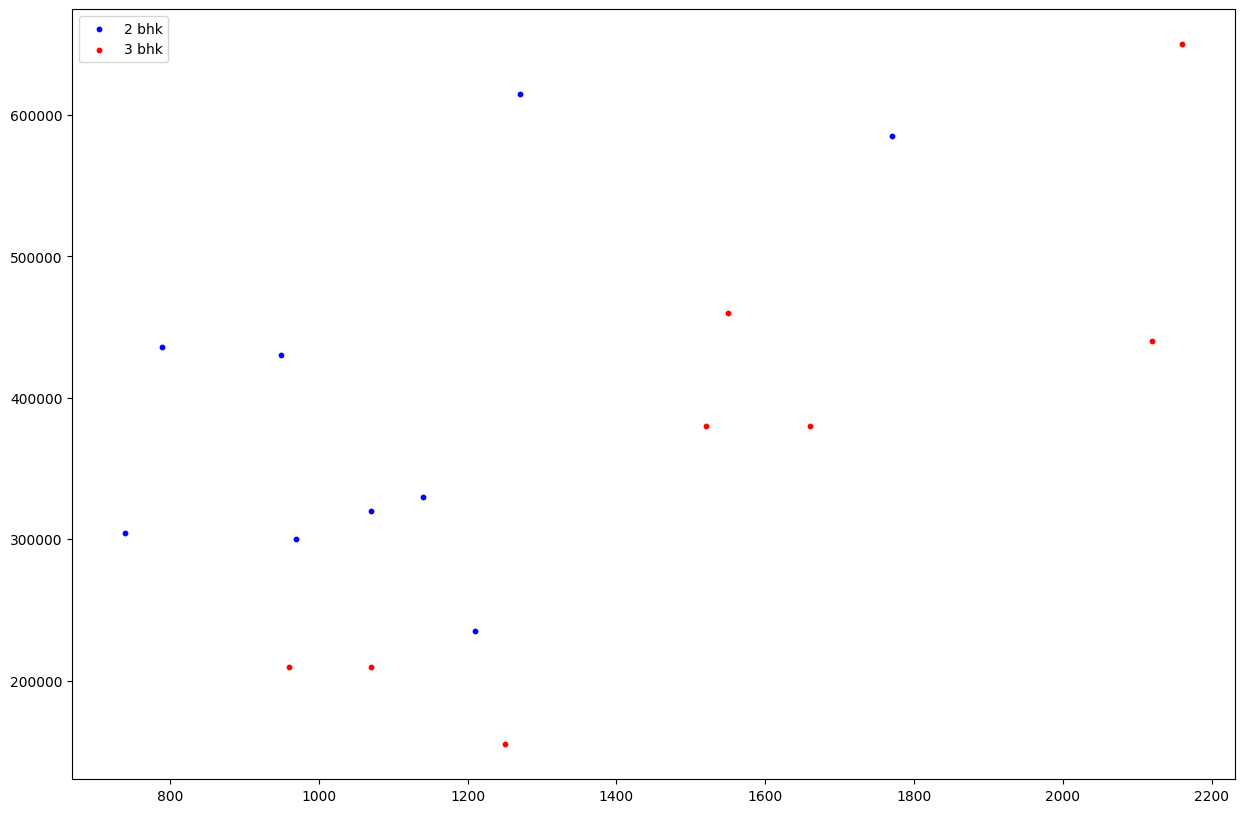

In [796]:
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(b2.sqft_living,b2.price,color='blue',s=10,label='2 bhk')
plt.scatter(b3.sqft_living,b3.price,color='red',s=10,label='3 bhk')
matplotlib.rcParams['figure.figsize']=(15,10)
plt.legend()
plt.show()

In [797]:
df.shape

(4488, 10)

In [798]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('city'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }

        for bhk,bhk_df in location_df.groupby('bedrooms'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df=remove_bhk_outliers(df)
df.shape

(1873, 10)

(array([ 23., 468., 520., 454., 276.,  86.,  36.,   9.,   0.,   1.]),
 array([  10.        ,  109.47619048,  208.95238095,  308.42857143,
         407.9047619 ,  507.38095238,  606.85714286,  706.33333333,
         805.80952381,  905.28571429, 1004.76190476]),
 <BarContainer object of 10 artists>)

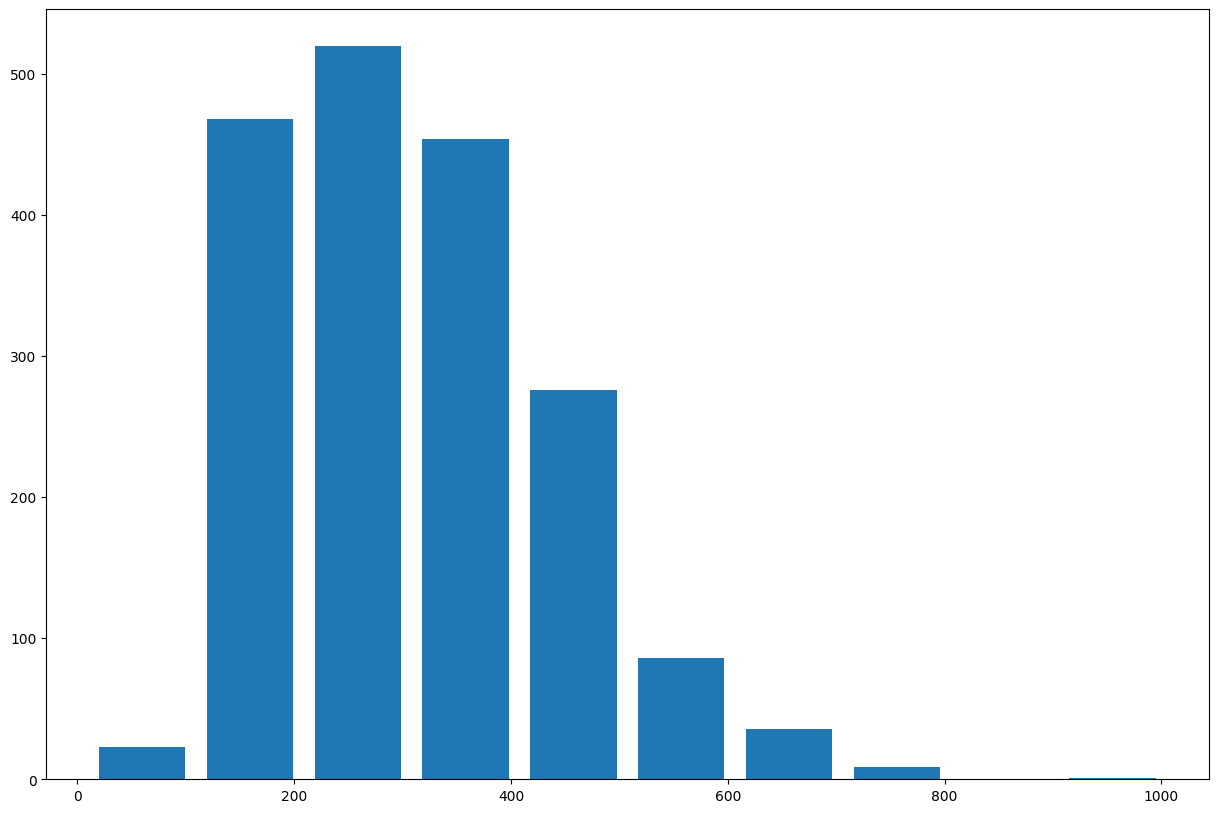

In [799]:
plt.hist(df.price_per_sqft,rwidth=0.8)

In [800]:
df[df.bedrooms<df.bathrooms]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,city,price_per_sqft,sqft_per_bedroom
75,531000.0,2.0,3.0,1270,1175,2.0,2000,Seattle,418.110236,635.0
1209,2150000.0,4.0,5.0,5060,10320,2.0,2008,Bellevue,424.901186,1265.0
3609,1600000.0,3.0,4.0,2820,7200,2.0,1930,Seattle,567.375887,940.0
4113,115000.0,1.0,2.0,1150,9812,1.0,1962,Auburn,100.000000,1150.0


In [801]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,city,price_per_sqft,sqft_per_bedroom
1,2384000.0,5.0,2.0,3650,9050,2.0,1921,Seattle,653.150685,730.0
5,490000.0,2.0,1.0,880,6380,1.0,1938,Seattle,556.818182,440.0
6,335000.0,2.0,2.0,1350,2560,1.0,1976,Redmond,248.148148,675.0
7,482000.0,4.0,2.0,2710,35868,2.0,1989,Maple Valley,177.859779,677.5
8,452500.0,3.0,2.0,2430,88426,1.0,1985,North Bend,186.213992,810.0


In [802]:
df.drop(['sqft_lot','price_per_sqft','sqft_per_bedroom','yr_built'],axis='columns',inplace=True)
df.shape

(1873, 6)

In [803]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,city
1,2384000.0,5.0,2.0,3650,2.0,Seattle
5,490000.0,2.0,1.0,880,1.0,Seattle
6,335000.0,2.0,2.0,1350,1.0,Redmond
7,482000.0,4.0,2.0,2710,2.0,Maple Valley
8,452500.0,3.0,2.0,2430,1.0,North Bend


In [804]:
dummy=pd.get_dummies(df.city).astype(int)
merge=pd.concat([df,dummy],axis='columns')
df_final=merge.drop(['city','other'],axis='columns')
df_final.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,Auburn,Bellevue,Bothell,Burien,Carnation,...,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville
1,2384000.0,5.0,2.0,3650,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,490000.0,2.0,1.0,880,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,335000.0,2.0,2.0,1350,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,482000.0,4.0,2.0,2710,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,452500.0,3.0,2.0,2430,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,640000.0,4.0,2.0,1520,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,463000.0,3.0,1.0,1710,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1400000.0,4.0,2.0,2920,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12,588500.0,3.0,1.0,2330,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14,1200000.0,5.0,2.0,2910,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [805]:
df_final.shape

(1873, 38)

In [806]:

X=df_final.drop('price',axis='columns')
y=df_final.price




In [807]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [808]:
from sklearn.linear_model import LinearRegression,Lasso
lr_model=Lasso(alpha=1.0, max_iter=10000)
lr_model.fit(X_train.values,y_train.values)
lr_model.score(X_test.values,y_test)

0.7885597108763299

In [809]:
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.7784706 , 0.78386498, 0.77968612, 0.8311129 , 0.8110791 ])

In [810]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [811]:

model_params = {
    'support_vector' : 
    {
        'model': SVR(gamma='auto'),
        'params': 
        {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'linear_regression' : 
    {
        'model': LinearRegression(),
        'params': 
        {
            'n_jobs':[1,-1,2]
        }
    },
    
    'random_forest':
    {
        'model':RandomForestRegressor(),
        'params':
        {
            'n_estimators':[100,200,500]
        }
    },
    'lasso': 
    {
        'model': Lasso(max_iter=10000),
        'params': 
        {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree':
    {
        'model':DecisionTreeRegressor(),
        'params':
        {
            'criterion': ['squared_error', 'poisson', 'friedman_mse', 'absolute_error'],
            'splitter': ['best', 'random']
        }
    }
}

In [812]:
# scores=[]
# for model_name,npp in model_params.items():
#     gs=GridSearchCV(npp['model'],npp['params'],cv=cv)
#     gs.fit(X_scaled,y)
#     scores.append(
#         {
#             'model':model_name,
#             'best_score':gs.best_score_,
#             'best_params':gs.best_params_
#         }
#     )
# import pandas as pd
# pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [813]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Auburn', 'Bellevue',
       'Bothell', 'Burien', 'Carnation', 'Clyde Hill', 'Covington',
       'Des Moines', 'Duvall', 'Enumclaw', 'Fall City', 'Federal Way',
       'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park',
       'Maple Valley', 'Medina', 'Mercer Island', 'Newcastle', 'Normandy Park',
       'North Bend', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle',
       'Shoreline', 'Snoqualmie', 'Tukwila', 'Vashon', 'Woodinville'],
      dtype='object')

In [814]:
import numpy as np
np.where(X.columns=='Bothell')[0][0]

6

In [815]:

from sklearn.preprocessing import StandardScaler

# Scaling the target variable (price)


# Updating the prediction function to inverse transform the predicted price
def predict_price(location, bhk, bath, sqft, floor):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk  # Scaled bhk
    x[1] = bath  # Scaled bath
    x[2] = sqft  # Scaled sqft
    x[3] = floor  # Scaled floor

    if loc_index >= 0:
        x[loc_index] = 1
    return lr_model.predict([x])[0]  # Convert back to original scale


In [816]:
predict_price('Seattle',5, 2,1, 2)

144812.29510070945

In [817]:
lr_model.intercept_

79018.28018780914

In [818]:
import pickle
with open('home_price_model.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [819]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))